In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

# Load the dataset from CSV file in the same directory
df = pd.read_csv("pcos_dataset.csv")

# Preview the first 5 rows of the dataset
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [37]:
# Shape of the dataset
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (1000, 6)


In [38]:
# Checking if the first row contains column names
print("\nColumns:")
print(df.columns)


Columns:
Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count', 'PCOS_Diagnosis'],
      dtype='object')


In [39]:
import os

In [40]:
# Checking file size
file_size = os.path.getsize("pcos_dataset.csv")
print("\nFile size:", file_size, "bytes")


File size: 20556 bytes


In [41]:
# Some statistics about the dataset
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-9.681145e-17,-9.592327e-17,2.042810e-17,-5.861978e-17,-1.740830e-16,0.199000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.399448
min,-1.627926e+00,-1.679887e+00,-1.061913e+00,-1.734855e+00,-1.764706e+00,0.000000
25%,-9.186416e-01,-9.095754e-01,-1.061913e+00,-7.974341e-01,-7.740138e-01,0.000000
50%,2.707102e-02,2.635275e-03,9.416966e-01,-6.890259e-03,7.515110e-02,0.000000
75%,8.545696e-01,8.337605e-01,9.416966e-01,8.700518e-01,8.181704e-01,0.000000
max,1.563854e+00,1.745971e+00,9.416966e-01,1.712435e+00,1.631953e+00,1.000000


In [42]:
# datatype of the features 
df.dtypes

Age                          float64
BMI                          float64
Menstrual_Irregularity       float64
Testosterone_Level(ng/dL)    float64
Antral_Follicle_Count        float64
PCOS_Diagnosis                 int64
dtype: object

In [43]:
# Checking for missing values in the dataset
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [44]:
# Creating a table where each row is a feature:
# checking: type(categorical/numerical), value range/unique values, and number of missing values

summary = []

for col in df.columns:
    # Determining if a feature is categorical or numerical
    if df[col].nunique() <= 10 and df[col].dtype != 'float64':
        col_type = "Categorical"
        values = sorted(df[col].dropna().unique())  # dropna avoids NaNs in list
    else:
        col_type = "Numerical"
        values = f"{df[col].min()} – {df[col].max()}"  # range for numerical
    
    # Counting missing values
    missing = df[col].isnull().sum()
    
    # Append row to summary list
    summary.append({
        "Feature": col,
        "Type": col_type,
        "Values / Range": values,
        "Missing Values": missing
    })

# Converting to DataFrame
feature_summary = pd.DataFrame(summary)

# Displaying the summary table
feature_summary

,Feature,Type,Values / Range,Missing Values
0,Age,Numerical,-1.627926096044883 – 1.5638540646705215,0
1,BMI,Numerical,-1.6798865743211138 – 1.745971167446332,0
2,Menstrual_Irregularity,Numerical,-1.061913167103641 – 0.9416965821485118,0
3,Testosterone_Level(ng/dL),Numerical,-1.7348549689768713 – 1.712434626868553,0
4,Antral_Follicle_Count,Numerical,-1.7647062285385824 – 1.6319534462489687,0
5,PCOS_Diagnosis,Categorical,"[0, 1]",0


In [45]:
# Checking for outliers using IQR method
numerical_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['PCOS_Diagnosis'])

for col in numerical_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} → Outliers: {len(outliers)}")

Age → Outliers: 0
BMI → Outliers: 0
Menstrual_Irregularity → Outliers: 0
Testosterone_Level(ng/dL) → Outliers: 0
Antral_Follicle_Count → Outliers: 0


In [46]:
!pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


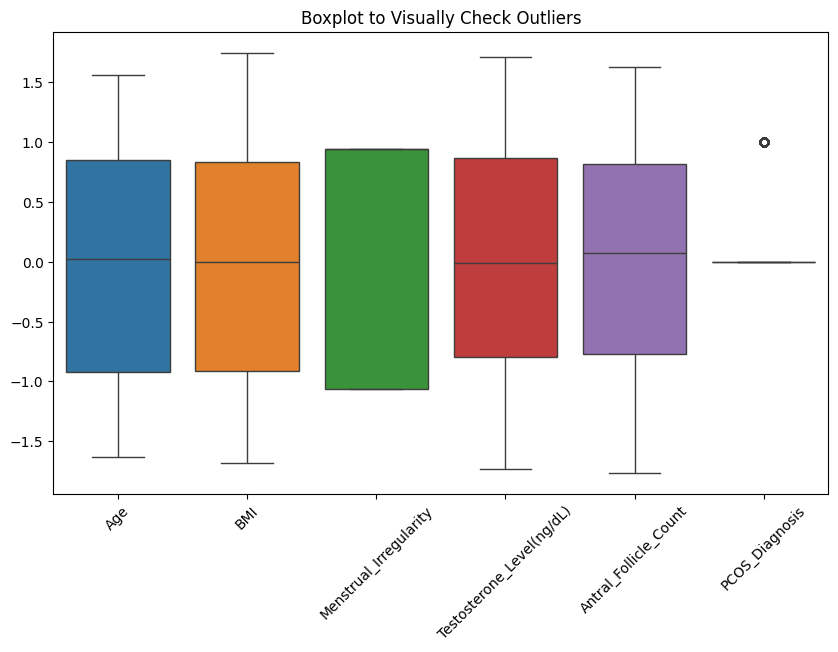

In [47]:
# Checking for outliers using Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for all numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Boxplot to Visually Check Outliers")
plt.show()

In [48]:
# Class balance in the target
df['PCOS_Diagnosis'].value_counts()

PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64

In [49]:
# Target info
print("Target column:", 'PCOS_Diagnosis')
print("Data type:", df['PCOS_Diagnosis'].dtype)
print("Unique values:", df['PCOS_Diagnosis'].unique())

Target column: PCOS_Diagnosis
Data type: int64
Unique values: [0 1]


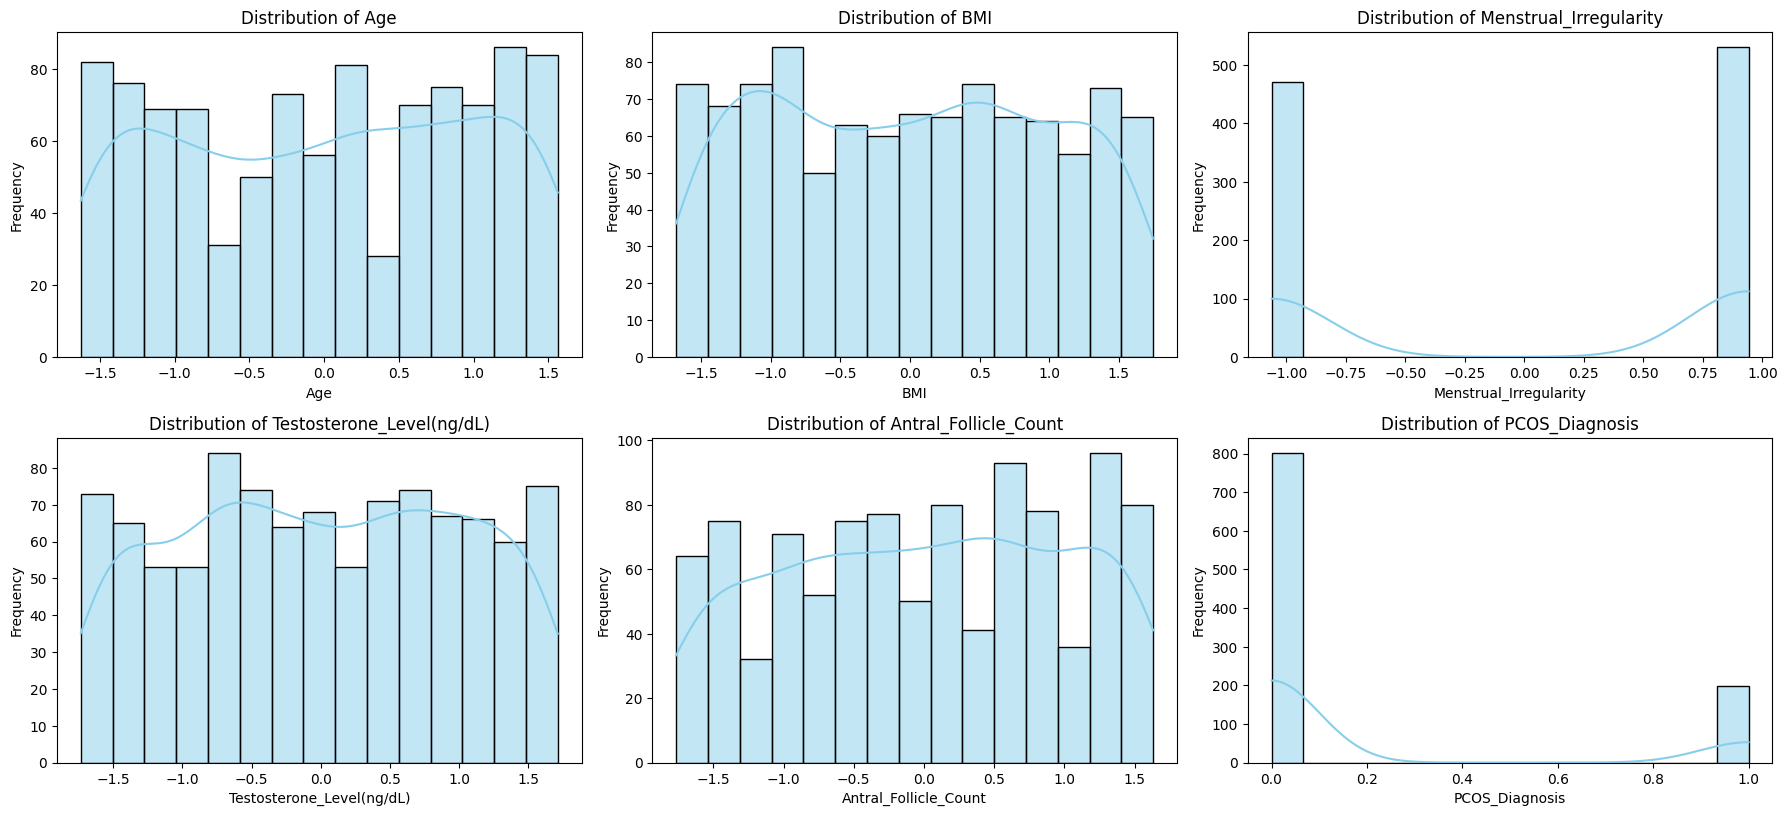

In [50]:
# Visualizing the features

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean up column names just in case
df.columns = df.columns.str.strip()

# Step 2: Select numerical features only (excluding the target)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Safely remove the target column if it's in the list
target_col = 'PCOS (Y/N)'
if target_col in numerical_features:
    numerical_features.remove(target_col)

# Step 3: Setup subplot layout
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))  # change shape based on how many features
axes = axes.flatten()

# Step 4: Loop and plot histograms
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=15, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

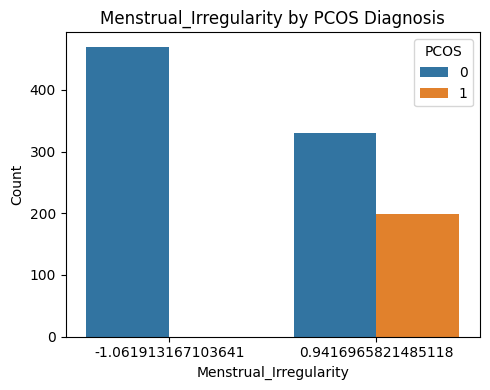

In [51]:
# Feature Visualization — Bar Plots for Binary Features (PCOS vs Non-PCOS)

import seaborn as sns
import matplotlib.pyplot as plt

# List of binary features to compare
binary_features = ['Menstrual_Irregularity']  # Add more if needed

# Loop through each binary feature and plot bar plot split by PCOS diagnosis
for feature in binary_features:
    plt.figure(figsize=(5, 4))
    
    # Count plot with hue based on PCOS_Diagnosis (target)
    sns.countplot(data=df, x=feature, hue='PCOS_Diagnosis')
    
    plt.title(f"{feature} by PCOS Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="PCOS")
    plt.tight_layout()
    plt.show()

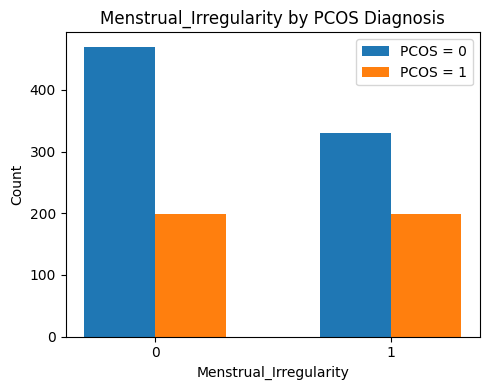

In [52]:
# Feature Visualization — Bar Plots for Binary Features (Using Matplotlib Only)

import matplotlib.pyplot as plt

# List of binary features to compare
binary_features = ['Menstrual_Irregularity']  # Add more if needed

# Loop through each binary feature
for feature in binary_features:
    # Count values for PCOS = 1 and PCOS = 0
    counts_1 = df[df['PCOS_Diagnosis'] == 1][feature].value_counts().sort_index()
    counts_0 = df[df['PCOS_Diagnosis'] == 0][feature].value_counts().sort_index()

    # X locations (0 and 1)
    x = [0, 1]
    
    # Creating the plot
    plt.figure(figsize=(5, 4))
    plt.bar([i - 0.15 for i in x], counts_0, width=0.3, label="PCOS = 0", align='center')
    plt.bar([i + 0.15 for i in x], counts_1, width=0.3, label="PCOS = 1", align='center')

    plt.title(f"{feature} by PCOS Diagnosis")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(x, ['0', '1'])
    plt.legend()
    plt.tight_layout()
    plt.show()

#Binary Features Summary and Analysis

In [53]:
#Find Binary Features
binary_features = []
for col in df.columns:
    if df[col].nunique() == 2 and col != 'PCOS_Diagnosis':  # Exclude target
        binary_features.append(col)

#Create Summary Table
binary_summary = []

for feature in binary_features:
    count_0 = (df[feature] == 0).sum()
    count_1 = (df[feature] == 1).sum()
    
    # Optional: Check how it correlates with PCOS
    corr_with_target = df[[feature, 'PCOS_Diagnosis']].corr().iloc[0, 1]
    
    binary_summary.append({
        'Feature': feature,
        'Count 0': count_0,
        'Count 1': count_1,
        'Correlation with PCOS': round(corr_with_target, 3)
    })

#Display Summary Table
import pandas as pd
binary_summary_df = pd.DataFrame(binary_summary)
binary_summary_df

,Feature,Count 0,Count 1,Correlation with PCOS
0,Menstrual_Irregularity,0,0,0.469


#Correlation heatmaps

In [54]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [55]:
!pip install numpy


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


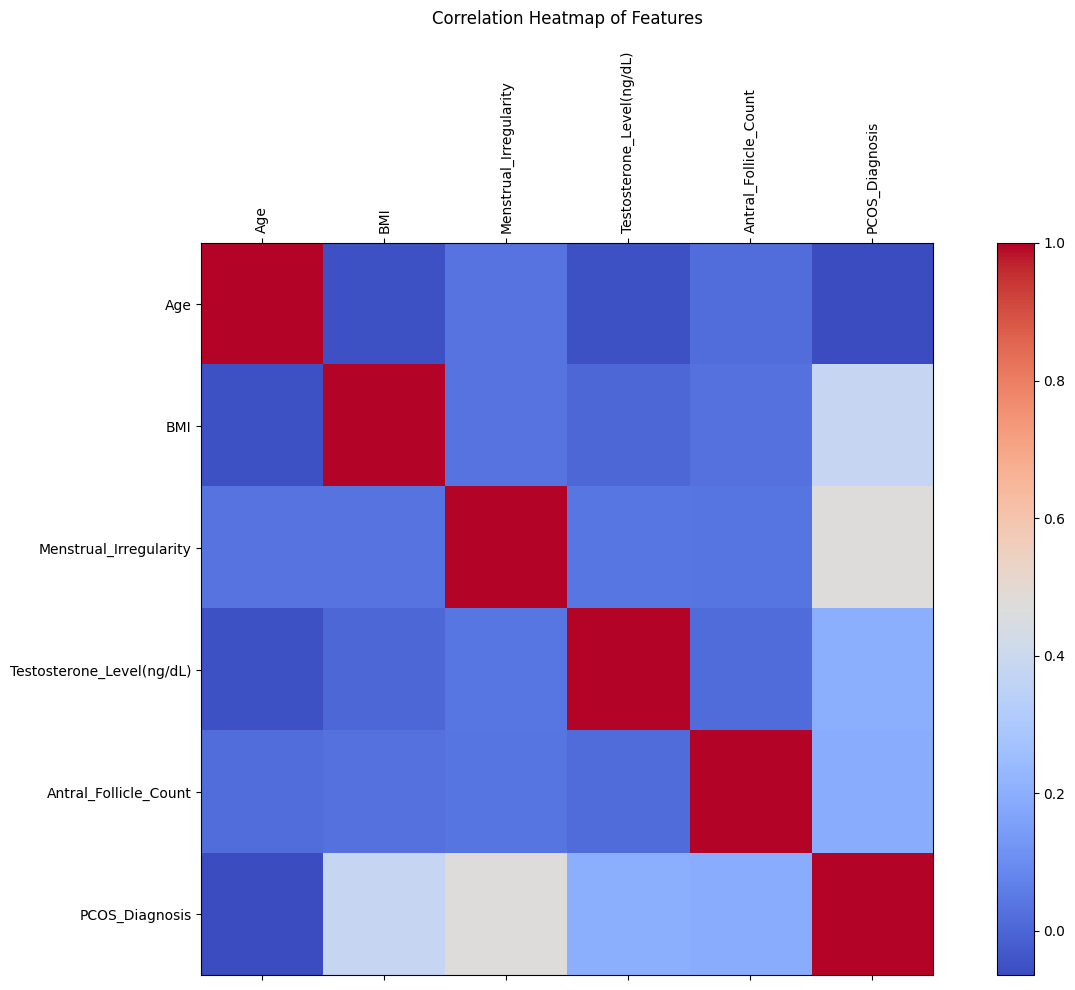

In [56]:
#Feature Visualization — Correlation Heatmap using Matplotlib Only

import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculating the correlation matrix
corr_matrix = df.corr()

# Step 2: Seting up the figure
fig, ax = plt.subplots(figsize=(14, 10))

# Step 3: Creating a heatmap using imshow
cax = ax.matshow(corr_matrix, cmap="coolwarm")

# Step 4: Adding colorbar
fig.colorbar(cax)

# Step 5: Seting axis ticks
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Step 6: Adding title
plt.title("Correlation Heatmap of Features", pad=20)
plt.tight_layout()

plt.show()

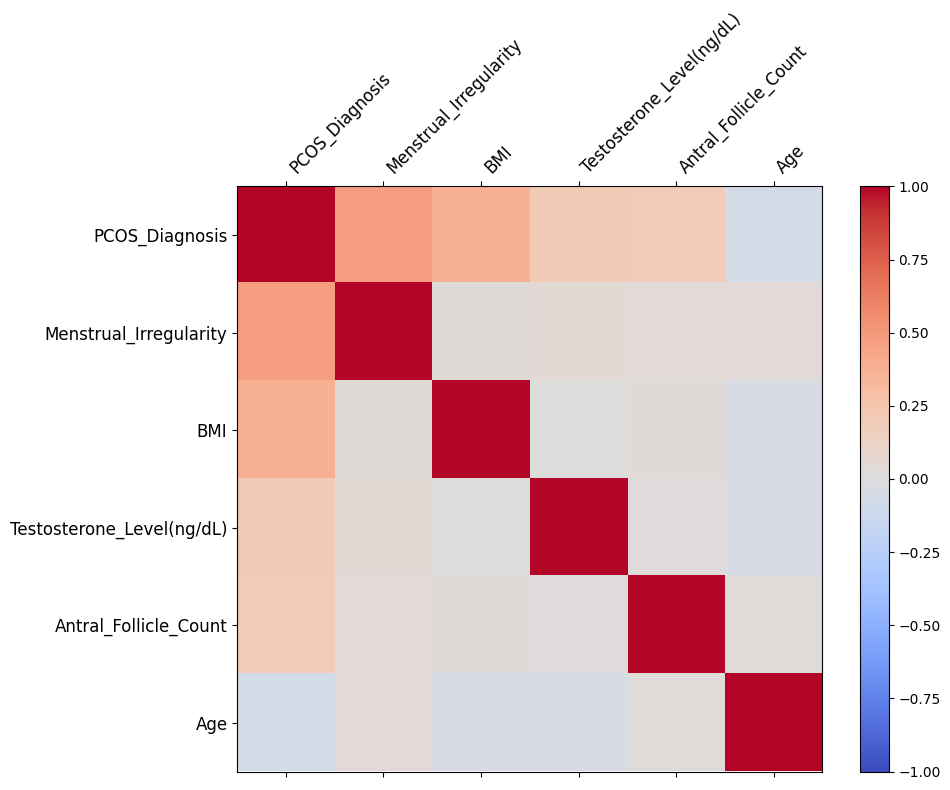

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df
corr = df[['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count', 'PCOS_Diagnosis']].corr()

# Sorting features based on correlation with PCOS_Diagnosis
corr_target = corr['PCOS_Diagnosis'].abs().sort_values(ascending=False)
sorted_features = corr_target.index.tolist()
corr = corr.loc[sorted_features, sorted_features]

# Masking upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Applying mask manually
for i in range(len(corr)):
    for j in range(len(corr)):
        if mask[i, j]:
            corr.iloc[i, j] = np.nan

# Ploting again with mask
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# Seting ticks
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, fontsize=12, rotation=45, ha='left')
ax.set_yticklabels(corr.index, fontsize=12)

# Colorbar
fig.colorbar(cax)

# Layout adjustments
plt.tight_layout()
plt.show()

In [58]:
#Checking Feature Correlations with PCOS Diagnosis

# Calculating correlation matrix
correlations = df.corr()

# Extracting correlation values with the target 'PCOS_Diagnosis'
pcos_corr = correlations['PCOS_Diagnosis'].drop('PCOS_Diagnosis')  # Remove self-correlation

# Sorting by strength
pcos_corr_sorted = pcos_corr.sort_values(ascending=False)

# Display
pcos_corr_sorted

Menstrual_Irregularity       0.469376
BMI                          0.377852
Testosterone_Level(ng/dL)    0.200817
Antral_Follicle_Count        0.192014
Age                         -0.064675
Name: PCOS_Diagnosis, dtype: float64

#Data Cleaning 
- data set has no useless ID columns or "Unnamed" columns
- one-hot encoding
- need to scale numerical features

In [59]:
#One-Hot Encoding Check

# Checking all features with 2 or fewer unique values (likely binary or categorical)
for col in df.columns:
    if df[col].nunique() <= 2:
        print(f"{col}: {df[col].unique()}")


Menstrual_Irregularity: [ 0.94169658 -1.06191317]
PCOS_Diagnosis: [0 1]


#One-Hot Encoding
- We checked whether one-hot encoding was necessary for our dataset.  
- Since all features are already numerical (either continuous or binary 0/1), no one-hot encoding was required for this project.

#Scaling Numerical Features

- We standardized all numerical features (except the target `PCOS_Diagnosis`) using StandardScaler.
- This ensures that all features are on the same scale, with mean = 0 and standard deviation = 1, 
which improves the performance of many machine learning models.

In [60]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [61]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns (excluding the target 'PCOS_Diagnosis')
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('PCOS_Diagnosis')  # Remove target from scaling

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting and transforming the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [62]:
# Checking after scaling
df[numerical_features].describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-3.597123e-17,-3.552714e-17,2.042810e-17,-1.776357e-17,3.552714e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.627926e+00,-1.679887e+00,-1.061913e+00,-1.734855e+00,-1.764706e+00
25%,-9.186416e-01,-9.095754e-01,-1.061913e+00,-7.974341e-01,-7.740138e-01
50%,2.707102e-02,2.635275e-03,9.416966e-01,-6.890259e-03,7.515110e-02
75%,8.545696e-01,8.337605e-01,9.416966e-01,8.700518e-01,8.181704e-01
max,1.563854e+00,1.745971e+00,9.416966e-01,1.712435e+00,1.631953e+00


#Splitting the Data into Training and Testing Sets

- To evaluate our machine learning models fairly, we split the dataset into a training set and a testing set.
- We use 80% of the data for training the model and 20% for testing.  
- Since this is a classification problem (predicting PCOS diagnosis),
  we use stratified sampling to maintain the proportion of PCOS-positive and PCOS-negative cases in both sets.

In [63]:
#Train/Test Split

from sklearn.model_selection import train_test_split

# Defining X (features) and y (target)
X = df.drop(columns=['PCOS_Diagnosis'])  # Features (everything except target)
y = df['PCOS_Diagnosis']                 # Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 800 samples
Testing set size: 200 samples


#Logistic Regression Model
- We first trained a Logistic Regression model to predict PCOS diagnosis. 
- Since predicting PCOS is a binary problem (0 = no PCOS, 1 = PCOS),
  Logistic Regression provides a strong and interpretable baseline to evaluate the effectiveness of more complex models later.


In [64]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creating and training the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluating model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9150
Confusion Matrix:
 [[149  11]
 [  6  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       160
           1       0.76      0.85      0.80        40

    accuracy                           0.92       200
   macro avg       0.86      0.89      0.87       200
weighted avg       0.92      0.92      0.92       200



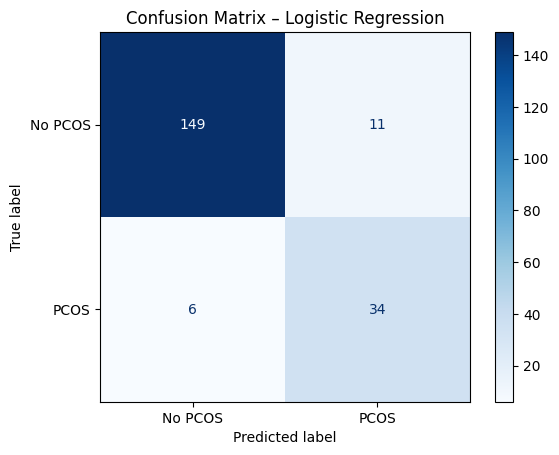

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(
    lr_model,               # use the correct model variable name
    X_test,
    y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Blues',
    values_format='d'
)

plt.title("Confusion Matrix – Logistic Regression")
plt.grid(False)
plt.show()

#Logistic Regression Model Interpretation

After training a Logistic Regression model to predict PCOS diagnosis:

Accuracy:The model achieved an accuracy of ~91.5% on the test set, indicating strong overall performance on unseen data.

Confusion Matrix Interpretation:
  - True Negatives (TN): Correctly predicted non-PCOS cases.
  - True Positives (TP): Correctly predicted PCOS cases.
  - False Positives (FP): Predicted PCOS when it was not present (Type I Error).
  - False Negatives (FN): Missed predicting PCOS when it was actually present (Type II Error).
  
  The confusion matrix helps us visualize where the model is making correct predictions and where it is making mistakes.

#Classification Report Overview:
  - Precision: How many predicted positive cases were actually correct.
  - Recall (Sensitivity): How many actual positive cases were correctly predicted.
  - F1-Score: The harmonic mean of Precision and Recall.
  - The model shows high precision and recall for the majority class, and reasonable performance for the minority class.

Overall, the model is effective at identifying PCOS cases, with balanced performance across precision, recall, and F1-score.


#Random Forest Classifier
- To build a stronger model and compare results, we also trained a Random Forest Classifier.
- Since our Logistic Regression model is linear, using Random Forest allows us to test a non-linear, 
more flexible model to see if it improves prediction accuracy for PCOS diagnosis.

In [66]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Creating and training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0000
Confusion Matrix:
 [[160   0]
 [  0  40]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



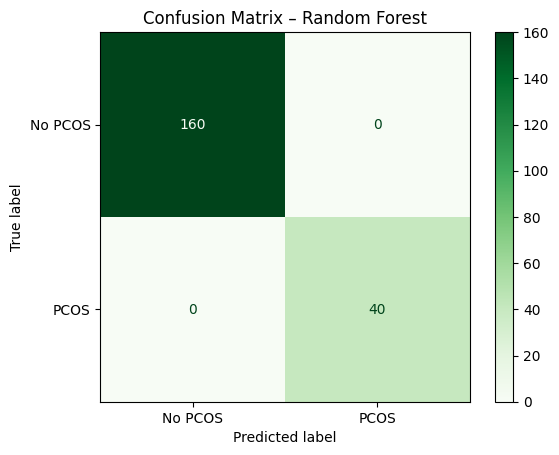

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Greens',
    values_format='d'
)

plt.title("Confusion Matrix – Random Forest")
plt.grid(False)
plt.show()

Small Random Forest Accuracy: 0.9950
Classification Report (Small RF):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       160
           1       0.98      1.00      0.99        40

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



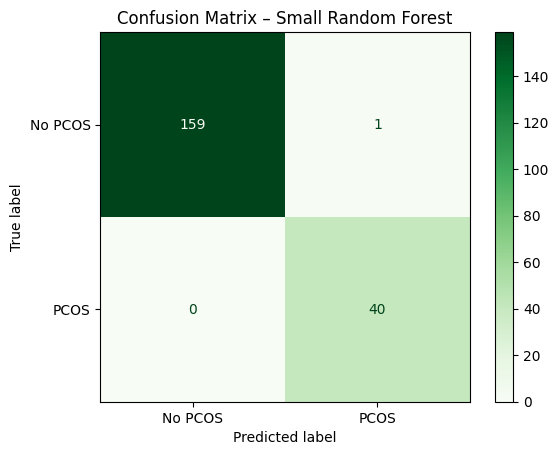

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Training a very small Random Forest
small_rf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
small_rf.fit(X_train, y_train)

# Predictions
y_pred_small_rf = small_rf.predict(X_test)

# Accuracy
accuracy_small_rf = accuracy_score(y_test, y_pred_small_rf)
print(f"Small Random Forest Accuracy: {accuracy_small_rf:.4f}")

# Classification Report
print("Classification Report (Small RF):")
print(classification_report(y_test, y_pred_small_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    small_rf, X_test, y_test,
    display_labels=["No PCOS", "PCOS"],
    cmap='Greens',
    values_format='d'
)
plt.title("Confusion Matrix – Small Random Forest")
plt.grid(False)
plt.show()